# Loan Default prediction

In [17]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Read The data
df=pd.read_csv("credit_risk_dataset.csv")

In [19]:
#Check the top rows
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [20]:
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


In [21]:
#check the bottom rows
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [22]:
#Checking of statistical veiw 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [23]:
#data distribution
print(f'The data contains:\n Number of rows: {df.shape[0]}\n Number of Columns: {df.shape[1]}')

The data contains:
 Number of rows: 32581
 Number of Columns: 12


In [24]:
#Check the null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
round(df.isnull().sum()*100/df.shape[0],2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [25]:
#Replace the null values with mean for numerical columns and mode for categorical columns
df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)

In [27]:
#Check the null vales after replacement
#df.isnull().sum()*100/df.shape[0]
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
#Takeout the categorical columns
cat_val=df.columns.tolist()
#cat_val=df.columns
cat_val

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [31]:
#Print all the variables with value counts
for column in cat_val:
    print(df[column].value_counts())
    print("-"*40)

23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: person_age, dtype: int64
----------------------------------------
60000    1046
30000     847
50000     778
40000     658
45000     590
         ... 
54316       1
54480       1
72645       1
72893       1
4888        1
Name: person_income, Length: 4295, dtype: int64
------------------------------

In [32]:
obj=df.select_dtypes(include="object").columns
obj

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [39]:
# create a sequence
browsers = ['Chrome','Firefox','Opera','Vivaldi']

# create an enumeratable and convert to list
x = list(enumerate(browsers))
print(x)

[(0, 'Chrome'), (1, 'Firefox'), (2, 'Opera'), (3, 'Vivaldi')]


In [40]:
fruits = [ "Apple","Berry","Cherry" ]
for i,j in enumerate(fruits):
     print(i,j)

0 Apple
1 Berry
2 Cherry


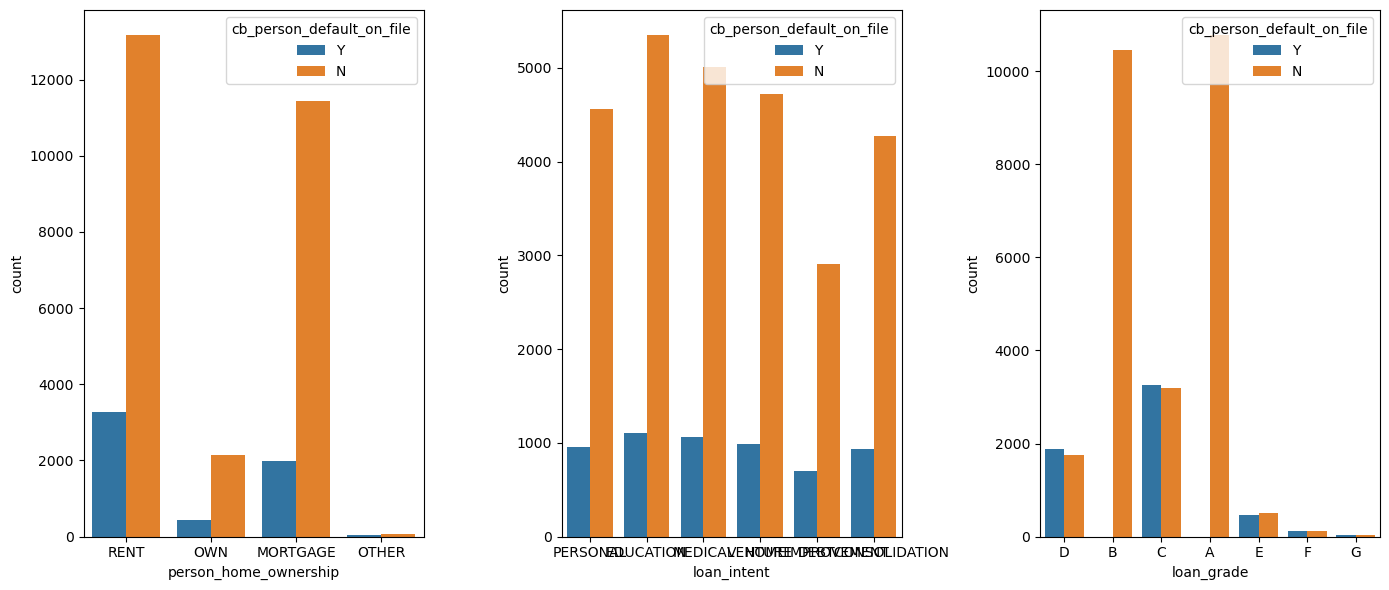

In [65]:
#Distribution of the categorical values using count plot with default status
obj1=['person_home_ownership', 'loan_intent', 'loan_grade']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(14,6))
axs=axs.flatten()
for i,var in enumerate (obj1):
    sns.countplot(data=df,x=var,hue='cb_person_default_on_file',ax=axs[i])
    
plt.tight_layout()

plt.show()

In [66]:
#len(axs.flat)

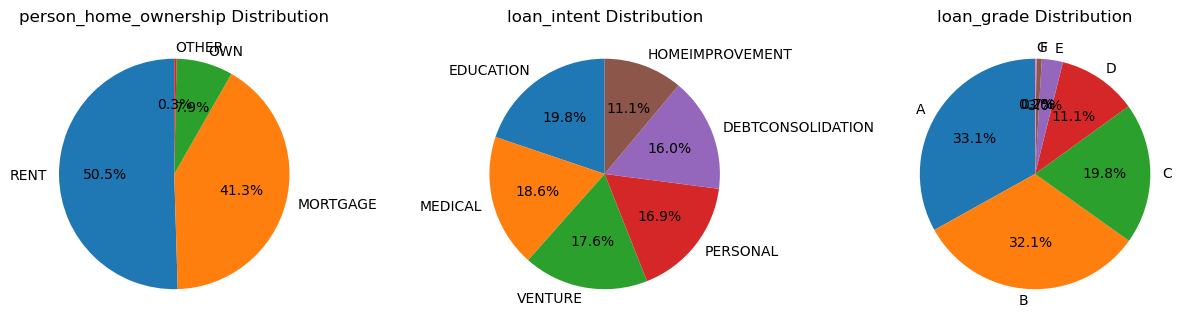

In [67]:
#categorical values distribution
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,7))

for i,var in enumerate (obj1):
    if i < len(axs.flat):
        obj_cont=df[var].value_counts()
        axs.flat[i].pie(obj_cont,labels=obj_cont.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

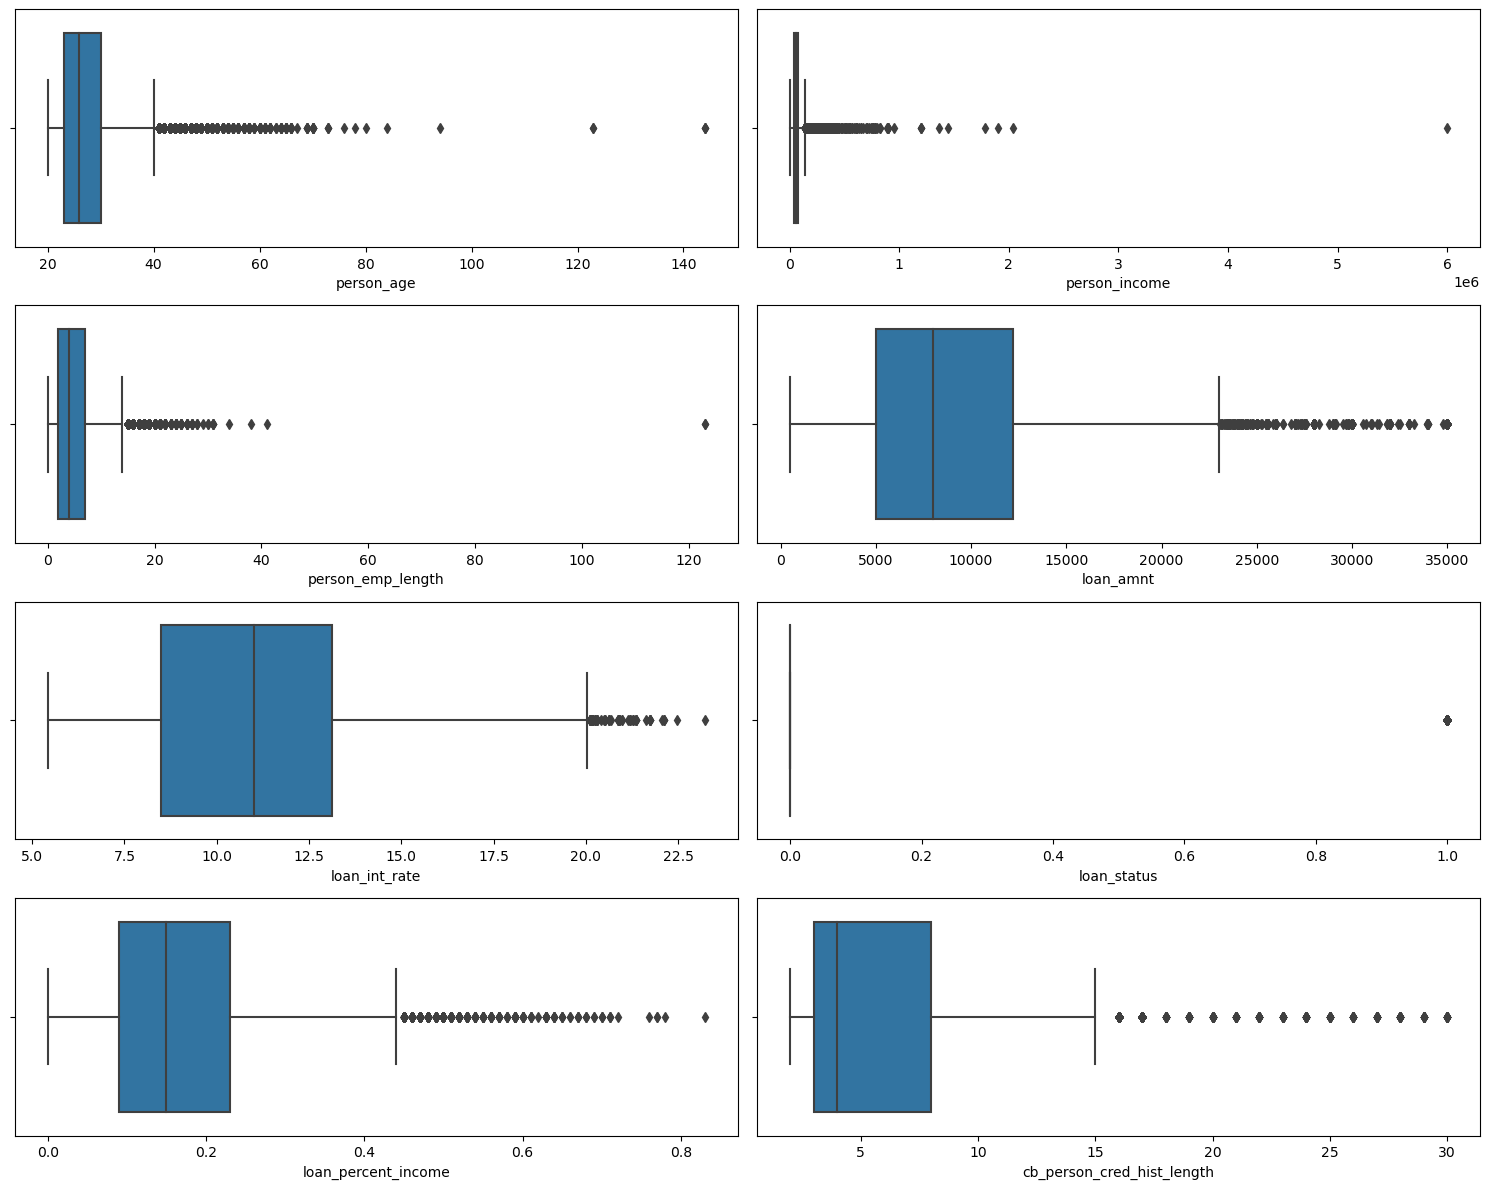

In [71]:
#Outlier detection using boxplot
num=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_status',
     'loan_percent_income','cb_person_cred_hist_length']
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(15,12))
axs=axs.flatten()
for i,var in enumerate(num):
    sns.boxplot(data=df,x=var,ax=axs[i])
fig.tight_layout()
plt.show()

C:\Users\shishir.sachan\AppData\Local\Temp\ipykernel_22652\2409998980.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot = True)


<Axes: >

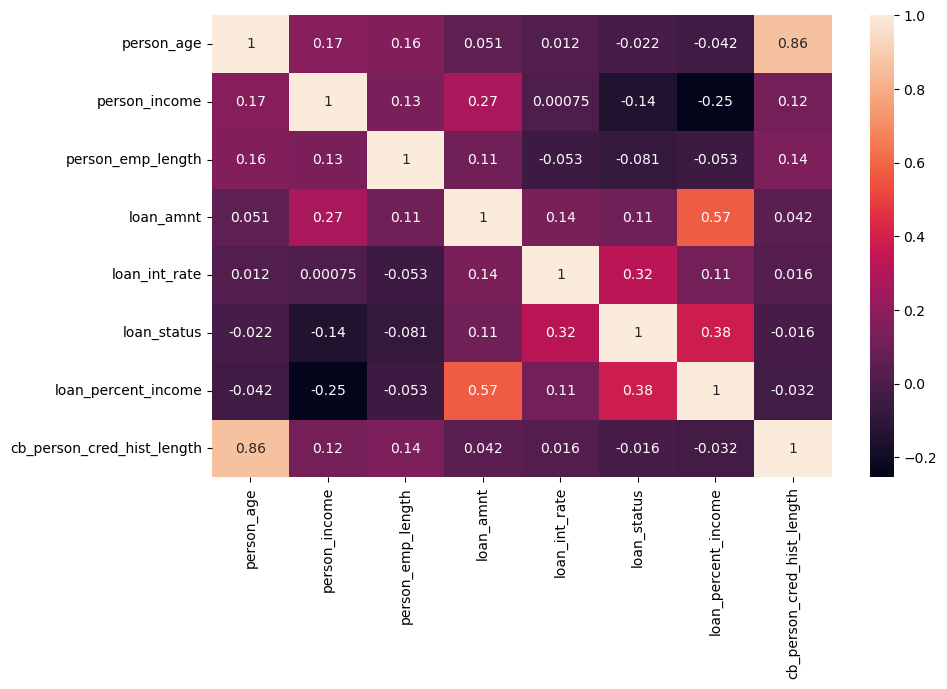

In [73]:
#Correlation Matrix
#sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);

plt.figure(figsize = (10, 6))
sns.heatmap(data=df.corr(), annot = True)

In [74]:
#import the necessary libraries for Chi_square test
import colorama
from colorama import Fore
from scipy.stats import chi2_contingency
import stat

In [75]:
#Select the categorical variables for chi_squrae test
obj=df.select_dtypes(include='object').columns
obj

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

person_home_ownership:


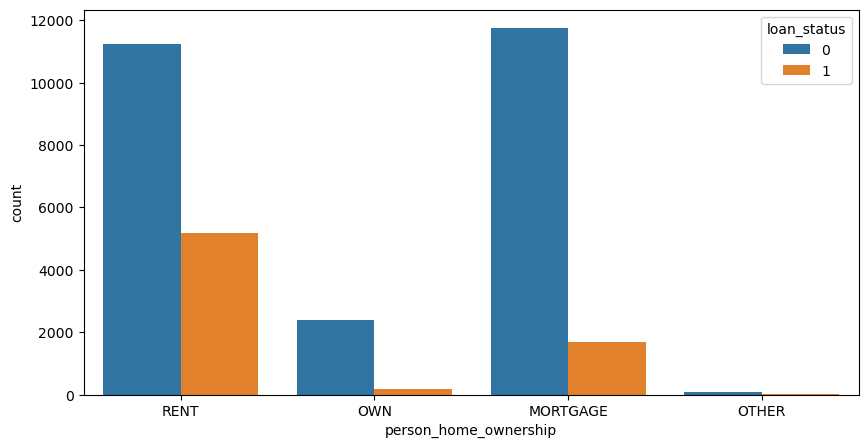

'person_home_ownership'is 'Good Predictor'
p_val=0.0

loan_intent:


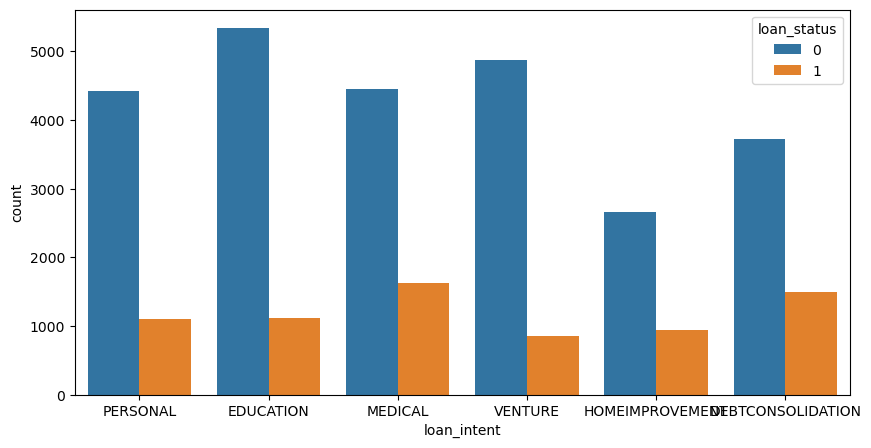

'loan_intent'is 'Good Predictor'
p_val=2.980681669776041e-110

loan_grade:


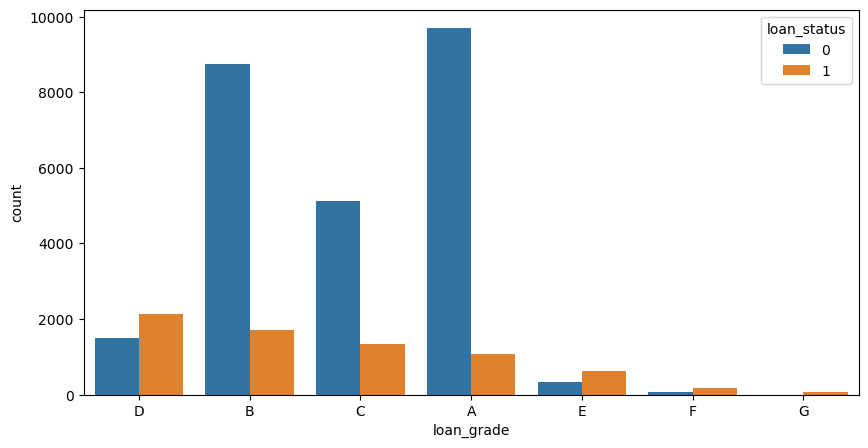

'loan_grade'is 'Good Predictor'
p_val=0.0

cb_person_default_on_file:


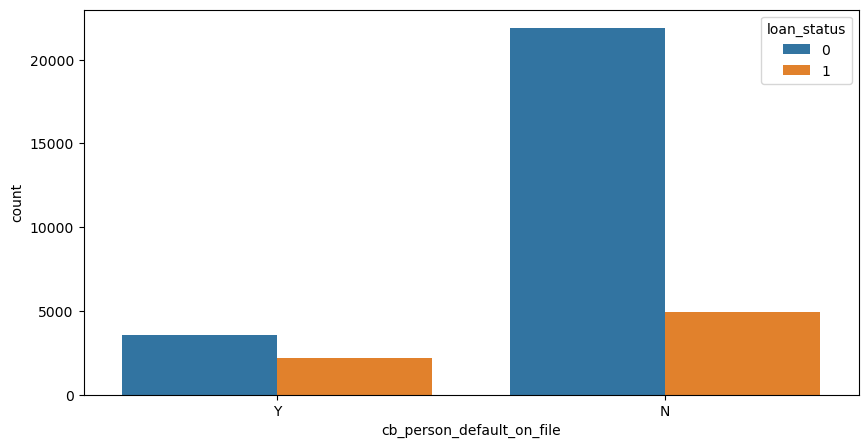

'cb_person_default_on_file'is 'Good Predictor'
p_val=2.226322450790568e-229



In [78]:
#Create the loop for categorical value for chi_square test
for i in obj:
    print(i + ":")
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,hue="loan_status",x=i)
    plt.show()
    a=np.array(pd.crosstab(df.loan_status, df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p >0.05:
        print(Fore.RED + "'{}'is 'bad predictor'".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + "'{}'is 'Good Predictor'".format(i))
        print('p_val={}\n'.format(p))

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
#Select the categorical columns and loop them for label encoding
for col in df.select_dtypes(include='object').columns:
    print(f'{col}:{df[col].unique()}')

person_home_ownership:['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file:['Y' 'N']


In [81]:
#Check the lable encoding for the categorical varibels
for col in df.select_dtypes(include='object').columns:

    lable_encod=LabelEncoder()
    lable_encod.fit(df[col].unique())
    df[col]=lable_encod.transform(df[col])
    print(f'{col}: {df[col].unique()}')

person_home_ownership: [3 2 0 1]
loan_intent: [4 1 3 5 2 0]
loan_grade: [3 1 2 0 4 5 6]
cb_person_default_on_file: [1 0]


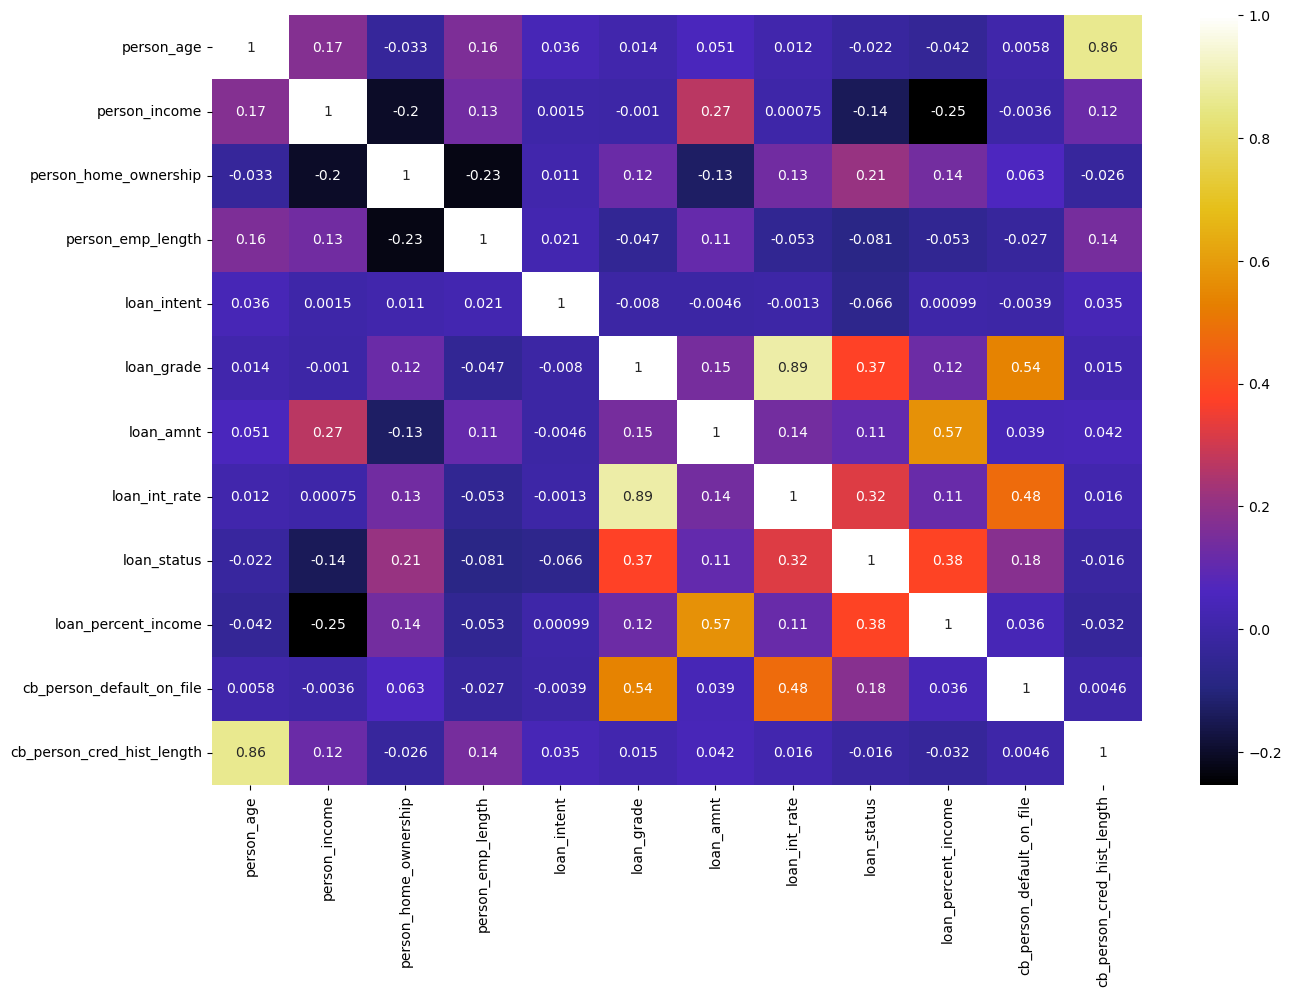

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);

In [87]:
#split the data for test and train sets
x=df.drop(['loan_status'],axis=1)
y=df['loan_status']
print(x.shape)
print(y.shape)

(32581, 11)
(32581,)


In [88]:
#split the train data 80% and test data 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [89]:
from scipy import stats

In [90]:
#outlier removal for numerical columns
sel_col=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income',
     'cb_person_cred_hist_length']

z_score=np.abs(stats.zscore(x_train[sel_col]))
threshold=3
outlier_inde=np.where(z_score > threshold)[0]
X_Train=x_train.drop(x_train.index[outlier_inde])
Y_Train=y_train.drop(y_train.index[outlier_inde])

In [91]:
#import the necessary library for train the data and validation for test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

In [92]:
#import the decision tree library and finetune the parmeter using gridserach
decison_tree=DecisionTreeClassifier(class_weight='balanced')
pram_grid={
    "max_depth":[3,4,5,6,7,8],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
    "random_state":[0,42]
}

grid_search=GridSearchCV(decison_tree,pram_grid,cv=5)
grid_search.fit(X_Train,Y_Train)
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [93]:
#lets feed the data to train the model along with parameter
dtree=DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2,random_state=42)
dtree.fit(X_Train,Y_Train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [94]:
#lets call the trained model to predict
y_pred=dtree.predict(x_test)
print(f'Accuracy_score: {round(accuracy_score(y_test,y_pred)*100,2)}%')

Accuracy_score: 92.33%


In [95]:
#Check the accuracy score and log loss
from sklearn.metrics import f1_score,precision_score,recall_score,log_loss
print(f'fl_score :',round((f1_score(y_test,y_pred,average='micro')),2))
print(f'Precision_score :',round((precision_score(y_test,y_pred,average='micro')),2))
print(f'Recall_score :',round((recall_score(y_test,y_pred,average='micro')),2))
print(f'Log_loss :',round((log_loss(y_test,y_pred)),2))

fl_score : 0.92
Precision_score : 0.92
Recall_score : 0.92
Log_loss : 2.77


In [96]:
#lets check the features importance useing the dtree
im_ft=pd.DataFrame({"Feature_names":X_Train.columns,"Features_importance":dtree.feature_importances_})
fe=im_ft.sort_values(by='Features_importance',ascending=False)

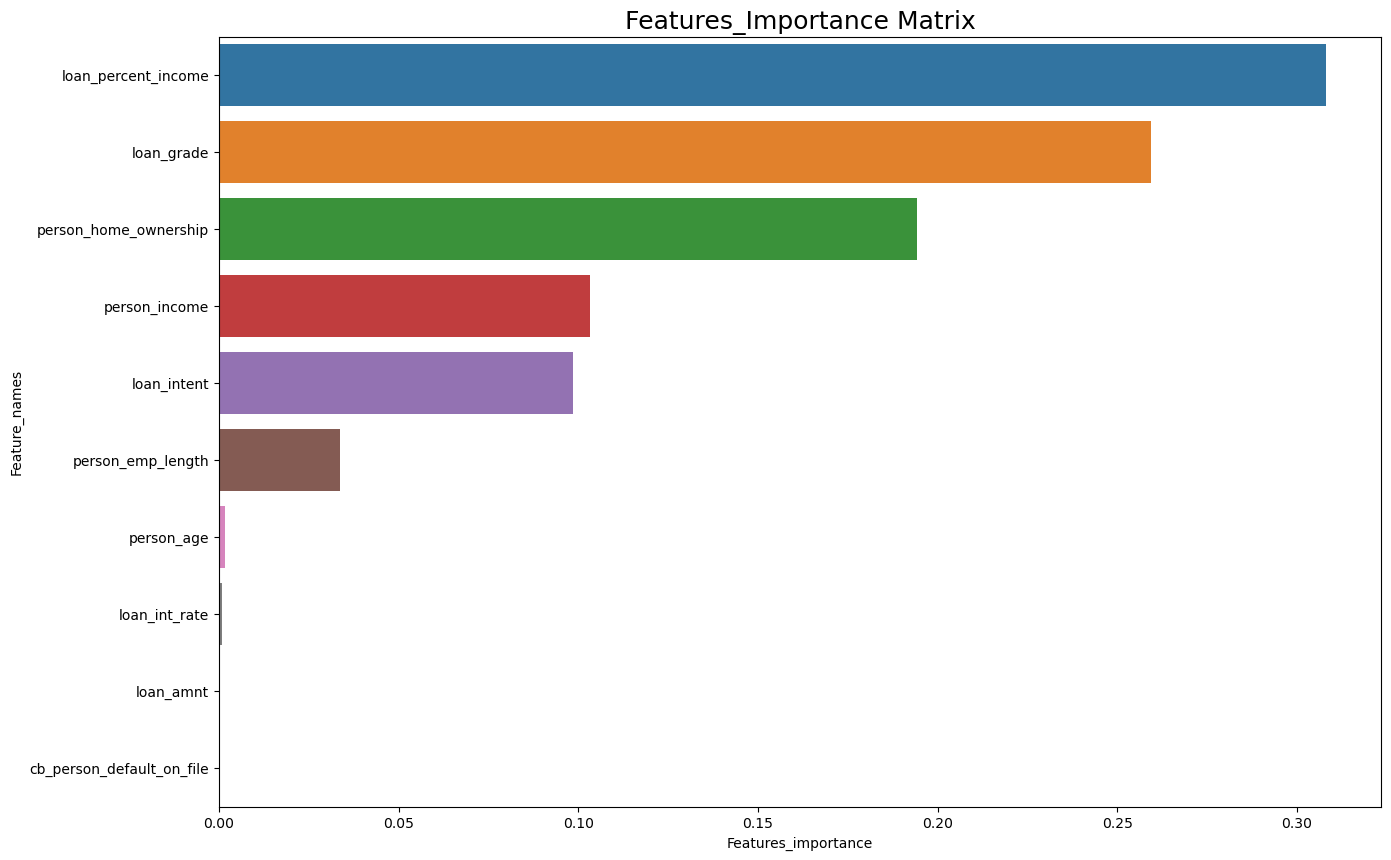

In [97]:
#plot the features importance matrix
fe1=fe.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1,x="Features_importance",y="Feature_names")
plt.title("Features_Importance Matrix",fontsize=18)
plt.show()

In [100]:
#!pip install shap

     -------------------------------------- 462.3/462.3 kB 1.8 MB/s eta 0:00:00


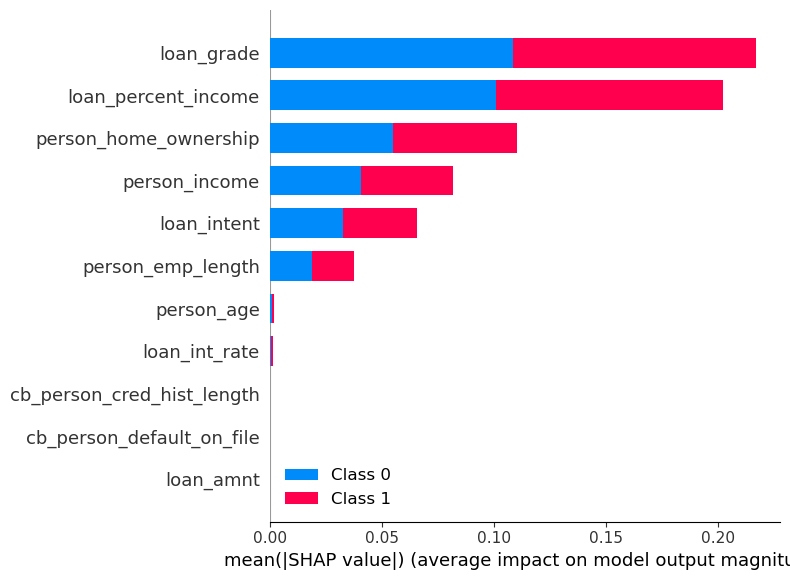

In [101]:
#using shap model to check the features importances
import shap
explianer=shap.TreeExplainer(dtree)
shap_values=explianer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


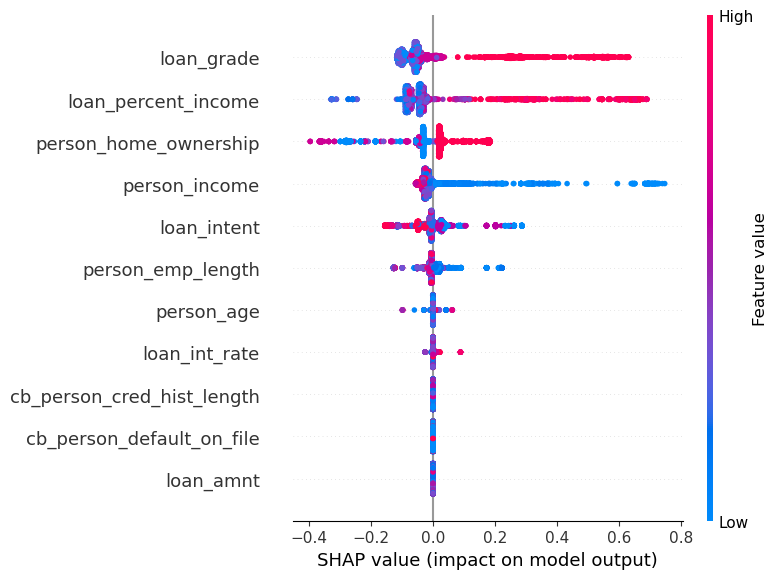

In [102]:
explianer=shap.TreeExplainer(dtree)
shap_values=explianer.shap_values(x_test)
shap.summary_plot(shap_values[1],x_test.values,feature_names=x_test.columns)

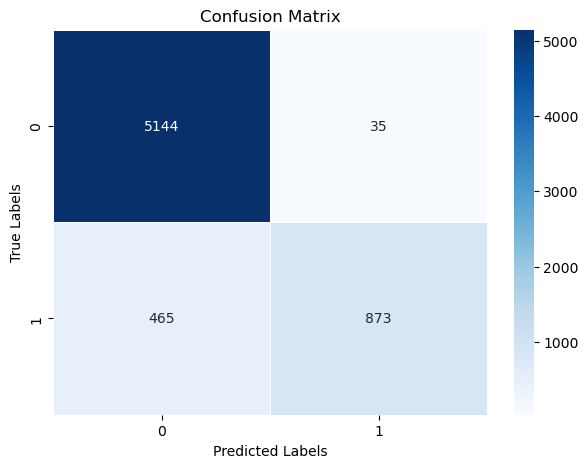

In [103]:
#plot the confusion matrix to check the true postive and false postive visa versa
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

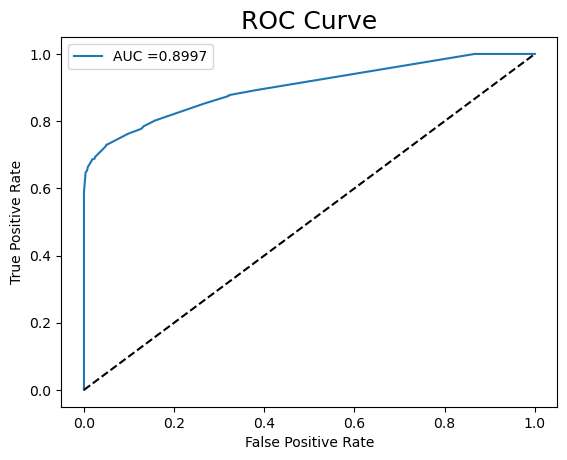

In [104]:
#lets plot the ROC curve bases on the predicted resluts
y_pred_prob=dtree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();

In [105]:
#using RFC will check the prediction score
from sklearn.ensemble import RandomForestClassifier

In [106]:
#import the library along with prameter tunning
rfc=RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt'],
    'random_state': [0, 42]
}
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_Train,Y_Train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [107]:
#train the model using the output parameter
rfc1=RandomForestClassifier(n_estimators=200 ,max_depth=None ,max_features='sqrt',random_state=0)
rfc1.fit(X_Train,Y_Train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [108]:
#predict the based on the trainned model
y_prd=rfc1.predict(x_test)
print(f'Accuracy Score: {round(accuracy_score(y_test,y_prd)*100,2)}%')

Accuracy Score: 93.31%


In [109]:
print(f'F1_score :{round(f1_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Precision_score :{round(precision_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Recall score :{round(recall_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Log_loss :{round(log_loss(y_test,y_prd),2)}')

F1_score :93.31
Precision_score :93.31
Recall score :93.31
Log_loss :2.41


In [110]:
#check the features importance using rfc
imp_fea=pd.DataFrame({"Feature_name":X_Train.columns,"importance":rfc1.feature_importances_})
imp_fea1=imp_fea.sort_values(by='importance',ascending=False)

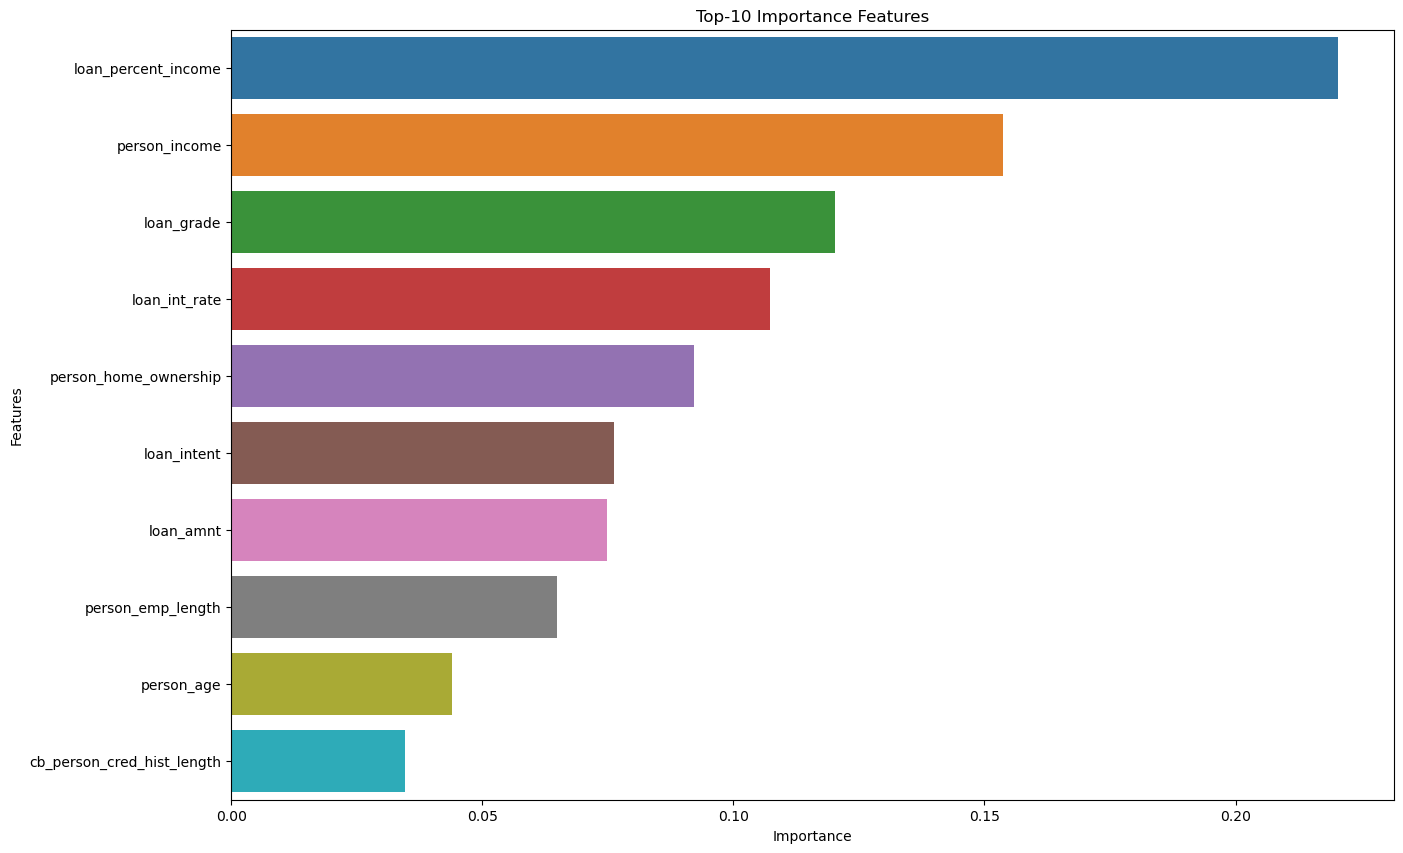

In [111]:
#plot the features importance
imp_fea2=imp_fea1.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=imp_fea2,x="importance",y="Feature_name")
plt.title('Top-10 Importance Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

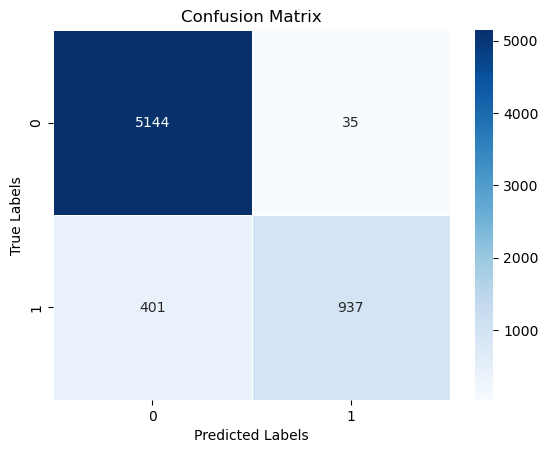

In [112]:
#plot the confusion matrix 
cm1=confusion_matrix(y_test,y_prd)
sns.heatmap(data=cm1,annot=True,cmap="Blues",linewidths=0.5,fmt="d");
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

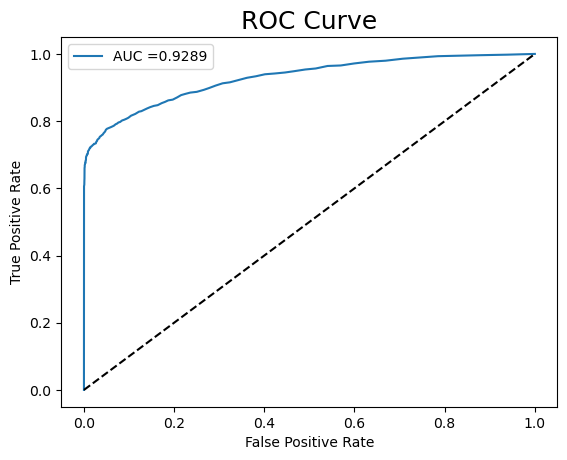

In [113]:
#plot the ROC curve using RFC predicted result
y_pred_prob=rfc1.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();